In [1]:
# set up environment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score

In [2]:
# import data
file_paths = [
    'SUMO_8hrs/record49999.txt',
    'SUMO_8hrs/record149999.txt',
    'SUMO_8hrs/record199999.txt',
    'SUMO_8hrs/record249999.txt',
    'SUMO_8hrs/record299999.txt',
    'SUMO_8hrs/record99999.txt'
]
df = [pd.read_csv(file, sep='\t', names=['cur_time', 'vehicle_id', 'x_cord', 'y_cord', 
        'vehicle_or_pedestrian', 'cluster', 'signal', 'entry', 'maneuver'], 
        header=None, index_col=False) for file in file_paths]

df = pd.concat(df, ignore_index=True)

          entry              maneuver             
          count mean min max    count mean min max
cluster                                           
0        230562  2.0   2   2   230562  2.0   2   2
1        136838  2.0   2   2   136838  1.0   1   1
2        122870  2.0   2   2   122870  1.0   1   1
3        160062  2.0   2   2   160062  0.0   0   0
4        268013  1.0   1   1   268013  2.0   2   2
5        277398  1.0   1   1   277398  1.0   1   1
6        293322  1.0   1   1   293322  0.0   0   0
7        222802  0.0   0   0   222802  2.0   2   2
8        124463  0.0   0   0   124463  1.0   1   1
9        100390  0.0   0   0   100390  1.0   1   1
10       257087  0.0   0   0   257087  0.0   0   0


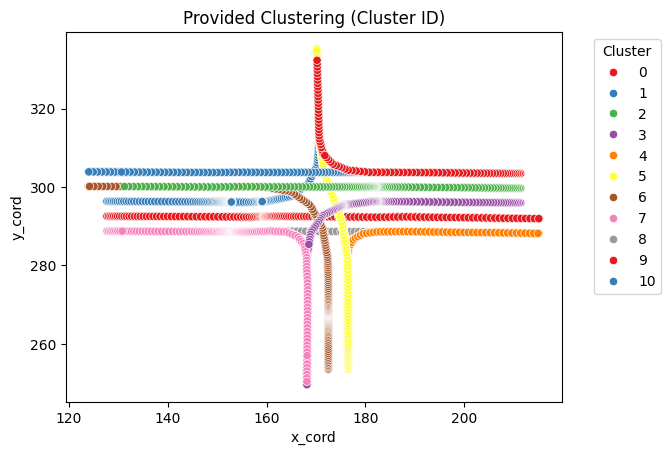

In [3]:
# analyze cluster ID
print(df.groupby('cluster')[['entry', 'maneuver']].agg(['count', 'mean', 'min', 'max']))

sns.scatterplot(x='x_cord', y='y_cord', hue='cluster', data=df, palette='Set1')
plt.title('Provided Clustering (Cluster ID)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

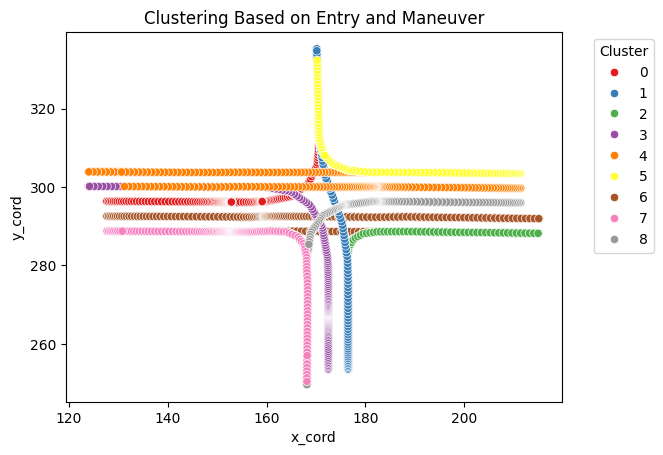

In [4]:
# cluster data based on entry and maneuver values
kmeans = KMeans(n_clusters=9, random_state=0)
df['cluster_entry_maneuver'] = kmeans.fit_predict(df[['entry', 'maneuver']])
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster_entry_maneuver', data=df, palette='Set1')
plt.title('Clustering Based on Entry and Maneuver')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

      vehicle_id       min_x       max_x       min_y       max_y
0              0  170.145156  176.478453  253.528941  335.121454
1              1  127.674940  170.665326  296.142287  334.778463
2              3  168.121803  211.398181  250.257184  296.288238
3              4  124.449324  211.395864  303.429853  303.856226
4              5  176.356870  214.743086  253.528941  288.619609
...          ...         ...         ...         ...         ...
7669       10247  176.353856  214.400031  253.528941  288.618389
7670       10248  130.444032  211.397029  299.680714  300.119032
7671       10249  170.726969  211.395864  303.429853  311.933400
7672       10250  179.124021  211.398181  295.938855  296.288452
7673       10252  208.377082  211.395864  303.429853  303.467066

[7674 rows x 5 columns]


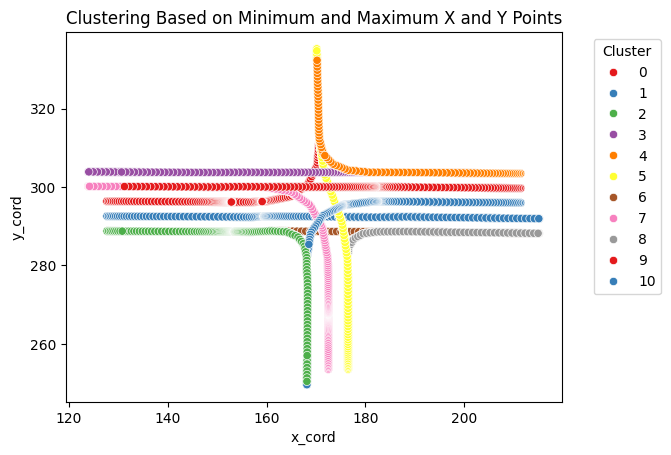

In [5]:
# cluster by minimum and maximum X and Y points
min_max_trajectory = df.groupby('vehicle_id').agg(
    min_x=('x_cord', 'min'),
    max_x=('x_cord', 'max'),
    min_y=('y_cord', 'min'),
    max_y=('y_cord', 'max')
).reset_index()
print(min_max_trajectory)

df = df.merge(min_max_trajectory, on='vehicle_id', how='left')

kmeans = KMeans(n_clusters=11, random_state=0)
df['cluster_min_max'] = kmeans.fit_predict(df[['min_x', 'max_x', 'min_y', 'max_y']])
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster_min_max', data=df, palette='Set1')
plt.title('Clustering Based on Minimum and Maximum X and Y Points')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

      vehicle_id     first_x      last_x     first_y      last_y
0              0  176.478453  170.145156  253.528941  335.121454
1              1  127.674940  170.152895  296.360325  334.778463
2              3  211.398181  168.155522  295.958610  250.257184
3              4  211.395864  124.449324  303.429853  303.856226
4              5  176.478453  214.743086  253.528941  288.187634
...          ...         ...         ...         ...         ...
7669       10247  176.478453  214.400031  253.528941  288.193244
7670       10248  211.397029  130.444032  299.680714  300.119032
7671       10249  211.395864  170.726969  303.429853  311.933400
7672       10250  211.398181  179.124021  295.958610  295.938855
7673       10252  211.395864  208.377082  303.429853  303.467066

[7674 rows x 5 columns]


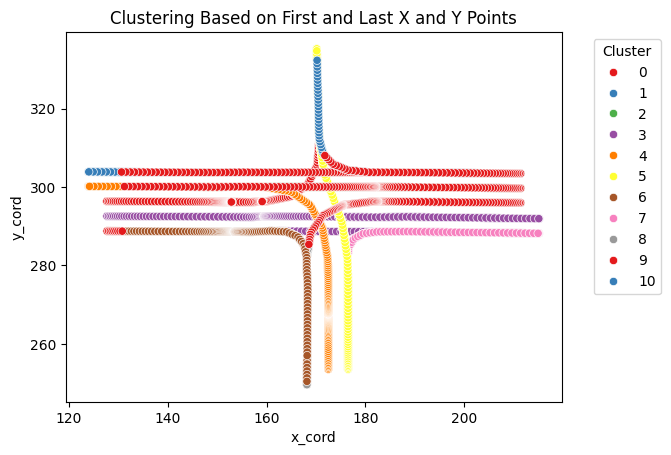

In [6]:
# cluster by first and last X and Y points
first_last_trajectory = df.groupby('vehicle_id').agg(
    first_x=('x_cord', lambda x: x.iloc[0]),
    last_x=('x_cord', lambda x: x.iloc[-1]),
    first_y=('y_cord', lambda y: y.iloc[0]),
    last_y=('y_cord', lambda y: y.iloc[-1])
).reset_index()
print(first_last_trajectory)

df = df.merge(first_last_trajectory, on='vehicle_id', how='left')

kmeans = KMeans(n_clusters=11, random_state=0)
df['cluster_first_last'] = kmeans.fit_predict(df[['first_x', 'last_x', 'first_y', 'last_y']])
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster_first_last', data=df, palette='Set1')
plt.title('Clustering Based on First and Last X and Y Points')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\ethan\AppData\Local\Temp\ipykernel_85368\435826608.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


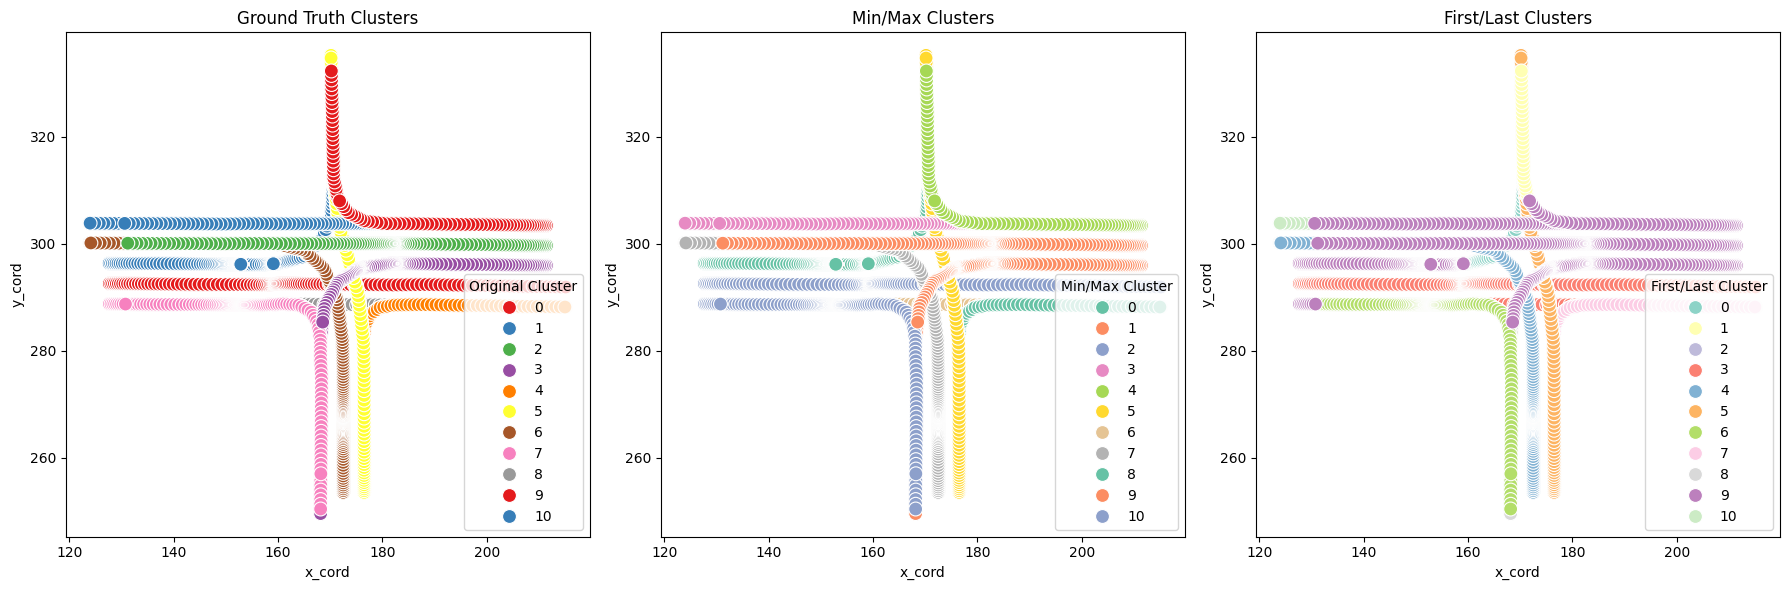

In [7]:
plt.figure(figsize=(18, 6))

# ground truth scatter
plt.subplot(1, 3, 1)
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster', data=df, palette='Set1', s=100)
plt.title('Ground Truth Clusters')
plt.legend(title='Original Cluster')

# min/max scatter
plt.subplot(1, 3, 2)
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster_min_max', data=df, palette='Set2', s=100)
plt.title('Min/Max Clusters')
plt.legend(title='Min/Max Cluster')

# first/last scatter
plt.subplot(1, 3, 3)
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster_first_last', data=df, palette='Set3', s=100)
plt.title('First/Last Clusters')
plt.legend(title='First/Last Cluster')

plt.tight_layout()
plt.show()

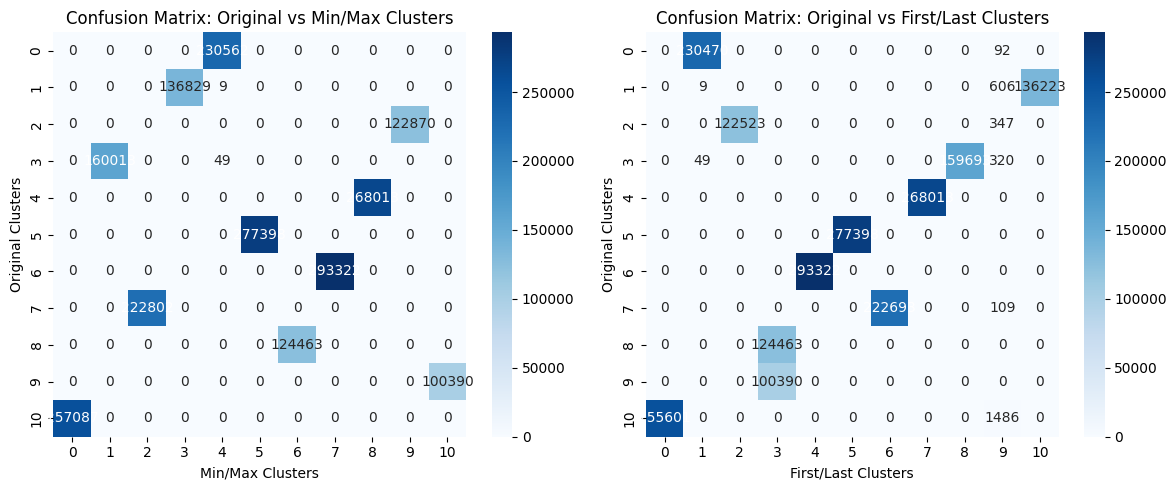

In [8]:
conf_matrix_min_max = confusion_matrix(df['cluster'], df['cluster_min_max'])
conf_matrix_first_last = confusion_matrix(df['cluster'], df['cluster_first_last'])

plt.figure(figsize=(12, 5))

# min/max confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_min_max, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(conf_matrix_min_max.shape[1]), 
            yticklabels=range(conf_matrix_min_max.shape[0]))
plt.title('Confusion Matrix: Original vs Min/Max Clusters')
plt.xlabel('Min/Max Clusters')
plt.ylabel('Original Clusters')

# first/last confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_first_last, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(conf_matrix_first_last.shape[1]), 
            yticklabels=range(conf_matrix_first_last.shape[0]))
plt.title('Confusion Matrix: Original vs First/Last Clusters')
plt.xlabel('First/Last Clusters')
plt.ylabel('Original Clusters')

plt.tight_layout()
plt.show()

In [9]:
# adjusted rand index
ari_min_max = adjusted_rand_score(df['cluster'], df['cluster_min_max'])
ari_first_last = adjusted_rand_score(df['cluster'], df['cluster_first_last'])

print("Adjusted Rand Index (Original vs Min/Max):", ari_min_max)
print("Adjusted Rand Index (Original vs First/Last):", ari_first_last)


Adjusted Rand Index (Original vs Min/Max): 0.9999488833043675
Adjusted Rand Index (Original vs First/Last): 0.9707480722126344


      vehicle_id  entry_time  exit_time  total_time
0              0           1        513         512
1              1          21        315         294
2              3          61        173         112
3              4          71        179         108
4              5          81        516         435
...          ...         ...        ...         ...
7669       10247      299821     299918          97
7670       10248      299861     299999         138
7671       10249      299931     299999          68
7672       10250      299951     299999          48
7673       10252      299991     299999           8

[7674 rows x 4 columns]


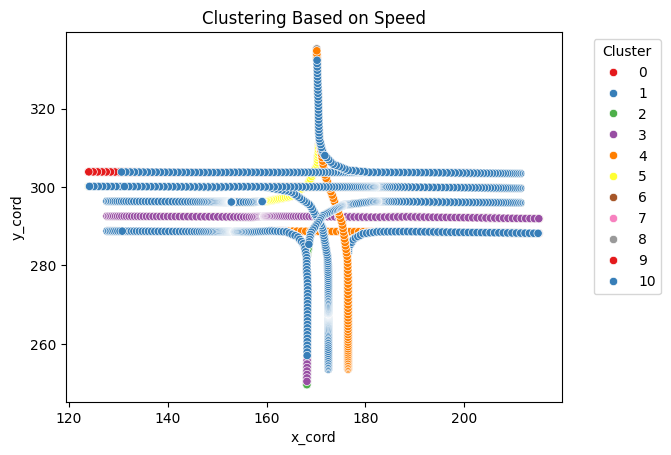

In [11]:
# clustering by speed

# total time
times = df.groupby('vehicle_id').agg(
    entry_time=('cur_time', 'min'),
    exit_time=('cur_time', 'max')
).reset_index()
times['total_time'] = times['exit_time'] - times['entry_time']
print(times)

df = df.merge(times, on='vehicle_id', how='left')

# total distance traveled
df['distance'] = np.sqrt((df['last_x'] - df['first_x'])**2 + (df['last_y']-df['first_y'])**2)

# speed = distance / time
df['speed'] = df['distance'] / df['total_time']

kmeans = KMeans(n_clusters=11, random_state=0)
df['cluster_speed'] = kmeans.fit_predict(df[['speed']])
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster_speed', data=df, palette='Set1')
plt.title('Clustering Based on Speed')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

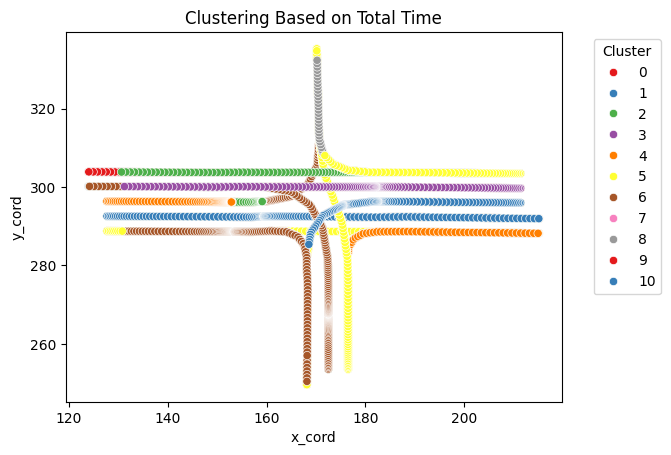

In [13]:
# clustering based on total time
kmeans = KMeans(n_clusters=11, random_state=0)
df['cluster_total_time'] = kmeans.fit_predict(df[['total_time']])
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster_total_time', data=df, palette='Set1')
plt.title('Clustering Based on Total Time')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
ari_speed = adjusted_rand_score(df['cluster'], df['cluster_speed'])
ari_total_time = adjusted_rand_score(df['cluster'], df['cluster_total_time'])
print("Adjusted Rand Index (Original vs Speed):", ari_speed)
print("Adjusted Rand Index (Original vs Total Time):", ari_total_time)

Adjusted Rand Index (Original vs Speed): 0.07647698075580023
Adjusted Rand Index (Original vs Total Time): 0.0192471153401285
